In [1]:
import glasbey
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.spatial.distance import pdist, squareform
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import decomposition
from sklearn.manifold import MDS

In [2]:
data = pd.read_csv('milk_data.csv', sep=';', index_col=['Product'])
data.head()

,Protein (%),Fat (%),Carbs (%),Water (%),Calories (kcal/100g),Consistency,Bacterial Content,Sugar (%),Ethanol (%),Acidity (pH),Salinity (%),Color
Product,,,,,,,,,,,,
Cottage Cheese,12.50,4.5,3.50,77.5,125.0,1,1,2.50,0.00,4.60,0.5,1
Sour Cream,2.50,20.0,3.00,60.0,210.0,3,1,2.50,0.00,4.35,0.5,1
Matzoni,3.50,3.5,5.00,87.5,65.0,6,1,5.00,0.25,4.40,0.2,1
Ryazhenka,3.00,5.0,5.25,85.0,92.5,3,1,5.25,0.00,4.50,0.3,3
Varenyets,3.15,6.0,5.25,85.0,102.5,3,1,5.25,0.00,4.50,0.4,3


In [3]:
labels = data.index

In [4]:
# to preprocess most of the data I use standardscaler (for numeric cols or categorical which have rank) column 'Bacterial Content' is categorical feature without rank thus here I use OHE
ct = ColumnTransformer(
    [("StandardScaler", StandardScaler(), data.columns.drop('Bacterial Content').to_list()),
     ("OHE", OneHotEncoder(drop='first'), ['Bacterial Content'])])

transformed = pd.DataFrame(data=ct.fit_transform(data), index=labels, columns=ct.get_feature_names_out())
transformed.head()

,StandardScaler__Protein (%),StandardScaler__Fat (%),StandardScaler__Carbs (%),StandardScaler__Water (%),StandardScaler__Calories (kcal/100g),StandardScaler__Consistency,StandardScaler__Sugar (%),StandardScaler__Ethanol (%),StandardScaler__Acidity (pH),StandardScaler__Salinity (%),StandardScaler__Color,OHE__Bacterial Content_2,OHE__Bacterial Content_3,OHE__Bacterial Content_4
Product,,,,,,,,,,,,,,
Cottage Cheese,0.299752,-0.602298,-0.071598,0.453289,-0.452713,-1.699412,-0.253390,-0.296201,-0.294385,-0.134815,-0.502571,0.0,0.0,0.0
Sour Cream,-0.769376,0.285243,-0.197126,-0.332689,0.048602,-0.491935,-0.253390,-0.296201,-0.665806,-0.134815,-0.502571,0.0,0.0,0.0
Matzoni,-0.662463,-0.659559,0.304988,0.902419,-0.806583,1.319280,0.346744,0.275044,-0.591522,-0.654816,-0.502571,0.0,0.0,0.0
Ryazhenka,-0.715920,-0.573668,0.367752,0.790137,-0.644392,-0.491935,0.406757,-0.296201,-0.442953,-0.481482,1.435916,0.0,0.0,0.0
Varenyets,-0.699883,-0.516407,0.367752,0.790137,-0.585414,-0.491935,0.406757,-0.296201,-0.442953,-0.308148,1.435916,0.0,0.0,0.0


In [5]:
# here i prepared dictionary with some classification of products for use more common classes in visualization and dictionaty for colors to use it in matplotlib
dict_milk_groups = {'Cottage Cheese': 'sour_cream-cottage', 
                    'Sour Cream': 'sour_cream-cottage',
                    'Matzoni': 'like-matzoni', 
                    'Ryazhenka': 'like_ryazhenka', 
                    'Varenyets': 'like_ryazhenka', 
                    'Yogurt' : 'yogurts', 
                    'Greek Yogurt': 'yogurts',
                    'Kefir': 'kefir_group', 
                    'Koumiss':'kefir_group', 
                    'Brie Cheese':'cheese_group', 
                    'Roquefort Cheese': 'cheese_group', 
                    'Cheddar Cheese': 'cheese_group',
                    'Mozzarella Cheese': 'cheese_group', 
                    'Milk': 'milk', 
                    'Butter': 'butter', 
                    'Dairy Cream': 'dairy_cream', 
                    'Soured Milk':'like-matzoni', 
                    'Buttermilk':'like-matzoni',
                    'Skyr': 'yogurts', 
                    'Ayran': 'like-matzoni', 
                    'Coalhada':'yogurts', 
                    'Dahi': 'yogurts', 
                    'Bryndza Cheese':'cheese_group', 
                    'Suluguni Cheese':'cheese_group', 
                    'Gouda Cheese':'cheese_group',
                    'Parmigiano Cheese':'cheese_group', 
                    'Ice Cream':'ice-cream'}

dict_groups_colors = {'sour_cream-cottage':'green',
                      'like-matzoni': 'yellowgreen',
                      'like_ryazhenka': 'orange',
                      'yogurts': 'grey',
                      'kefir_group':'cyan',
                      'cheese_group': 'yellow',
                      'milk':'red',
                      'butter' : 'magenta',
                      'dairy_cream': 'purple',
                      'ice-cream':'black'}

### Ordinations

In [6]:
# here i made table for MDS
embedding = MDS(n_components=2, dissimilarity='euclidean')
table_for_mds = embedding.fit_transform(transformed)
table_for_mds = pd.DataFrame(table_for_mds)
table_for_mds.columns = ['x', 'y']
table_for_mds['labels'] = labels
table_for_mds['group'] = table_for_mds['labels'].map(dict_milk_groups)
table_for_mds['color'] = table_for_mds['group'].map(dict_groups_colors)
table_for_mds.head()

,x,y,labels,group,color
0,0.413476,-1.741019,Cottage Cheese,sour_cream-cottage,green
1,0.057320,-0.288981,Sour Cream,sour_cream-cottage,green
2,1.965480,0.890962,Matzoni,like-matzoni,yellowgreen
3,1.715626,-2.045168,Ryazhenka,like_ryazhenka,orange
4,1.580945,-2.076440,Varenyets,like_ryazhenka,orange


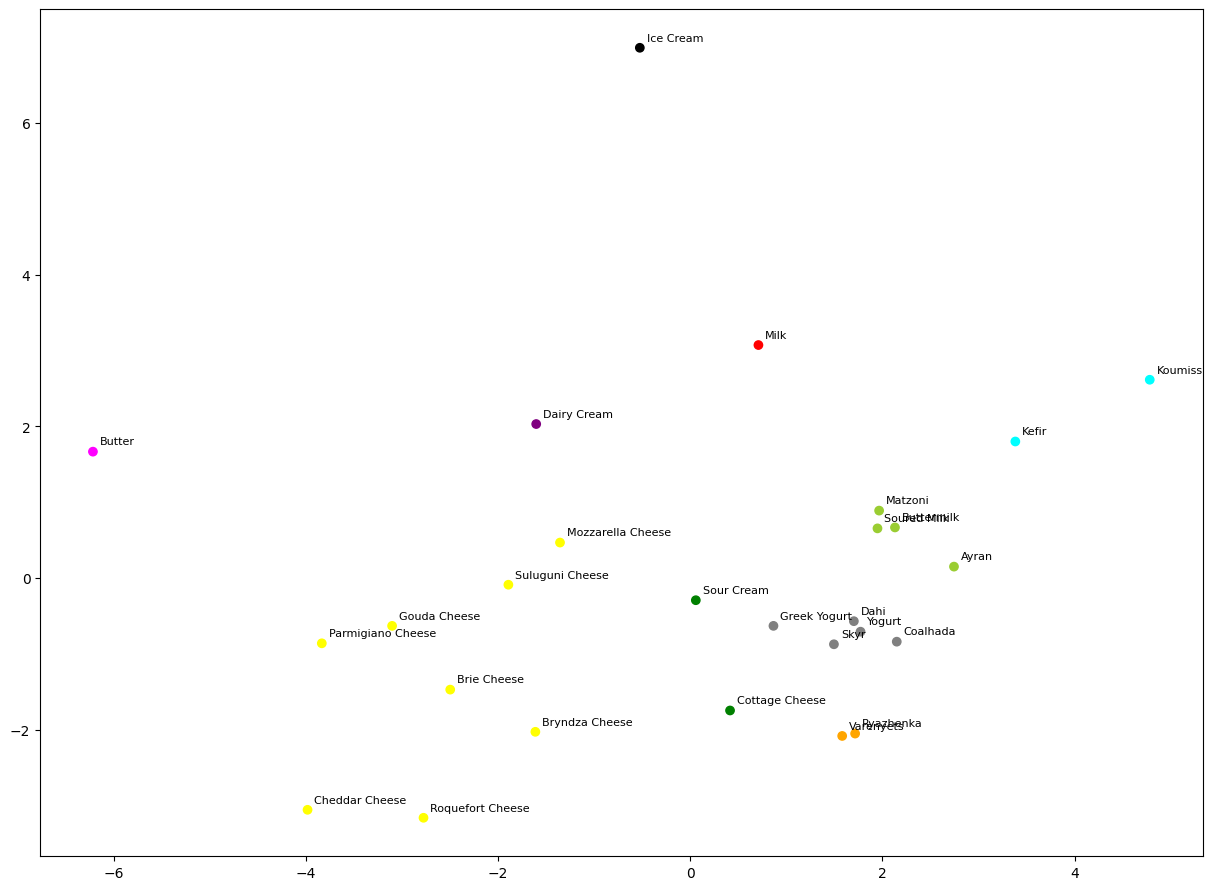

In [7]:
plt.figure(figsize=(15, 11))
plt.scatter(table_for_mds['x'], table_for_mds['y'], c=table_for_mds['color'])
for i, label in enumerate(table_for_mds['labels']):
    plt.annotate(table_for_mds['labels'][i], (table_for_mds['x'][i], table_for_mds['y'][i]), xytext=(5,5), textcoords='offset points', fontsize=8)
plt.savefig('01_mds_milk_mpl.jpg', bbox_inches='tight')
plt.show()

In [8]:
# below i set palette for colorblind cases for use it with seaborn scatter
palette = glasbey.create_palette(
    palette_size=12,
    colorblind_safe=True,
    cvd_type="protanomaly",
    cvd_severity=100
)

C:\Users\vladk\AppData\Local\Temp\ipykernel_5884\621144025.py:2: UserWarning: The palette list has more values (12) than needed (10), which may not be intended.
  sns.scatterplot(data = table_for_mds, x='x', y ='y', hue='group', palette=palette)


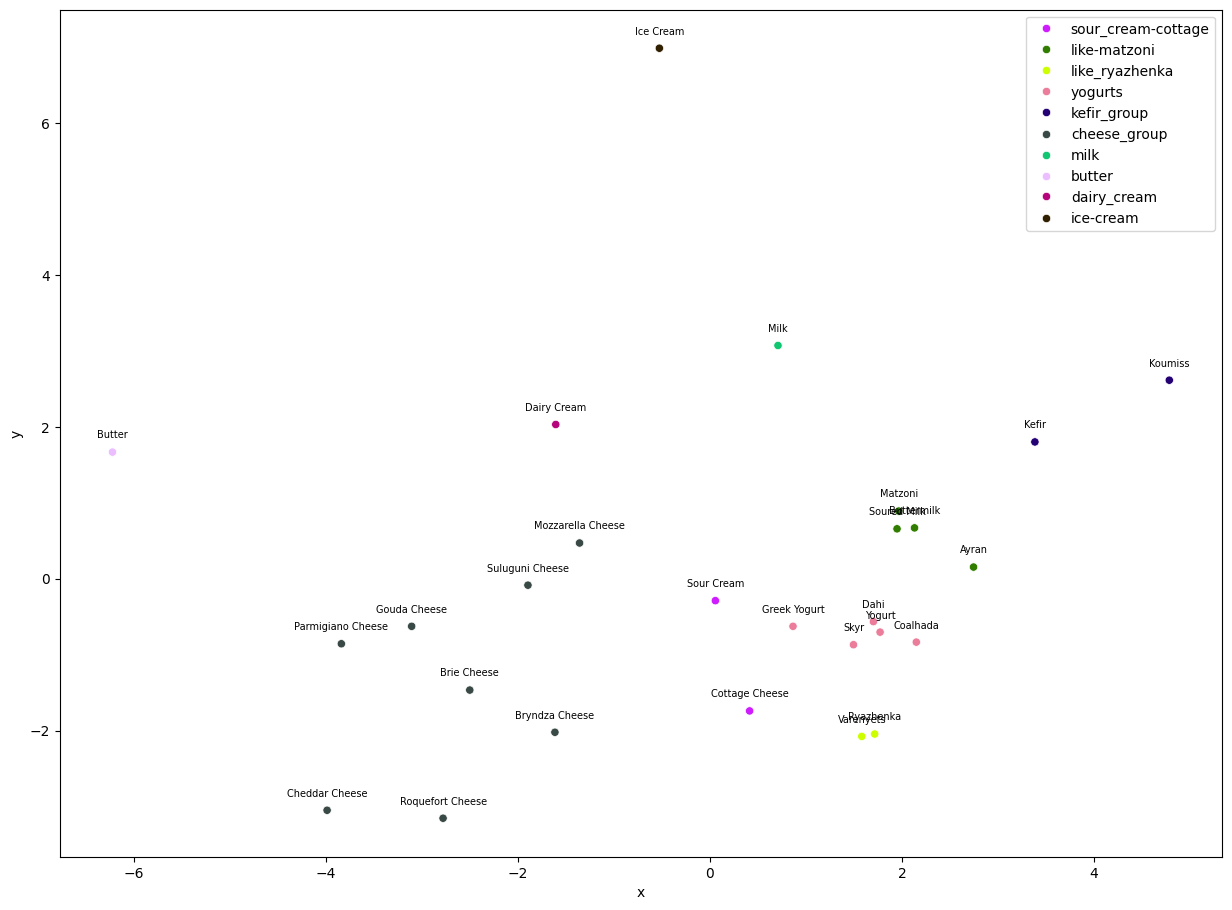

In [9]:
plt.figure(figsize=(15, 11))
sns.scatterplot(data = table_for_mds, x='x', y ='y', hue='group', palette=palette)
for i in range(len(table_for_mds)):
    plt.annotate(table_for_mds['labels'][i], (table_for_mds['x'][i], table_for_mds['y'][i]), textcoords='offset points', xytext=(0,10), ha='center',  fontsize=7)
plt.legend(bbox_to_anchor = (1,1), fontsize=10)
plt.savefig('02_mds_milk_sns_colorsafe.jpg', bbox_inches='tight')
plt.show()

In [10]:
# same operations for PCA
pca = decomposition.PCA(n_components=2)
pca_proc = pca.fit_transform(transformed)
print(pca_proc.shape)
ordination_pca = pd.DataFrame(pca_proc, columns=['x', 'y'])
ordination_pca['labels'] = labels
ordination_pca['group'] = ordination_pca['labels'].map(dict_milk_groups)
ordination_pca['color'] = ordination_pca['group'].map(dict_groups_colors)
ordination_pca.head()

(27, 2)


,x,y,labels,group,color
0,0.256933,-0.149990,Cottage Cheese,sour_cream-cottage,green
1,-0.000049,-0.138748,Sour Cream,sour_cream-cottage,green
2,2.103635,-0.432902,Matzoni,like-matzoni,yellowgreen
3,1.010530,0.221189,Ryazhenka,like_ryazhenka,orange
4,0.889315,0.225031,Varenyets,like_ryazhenka,orange


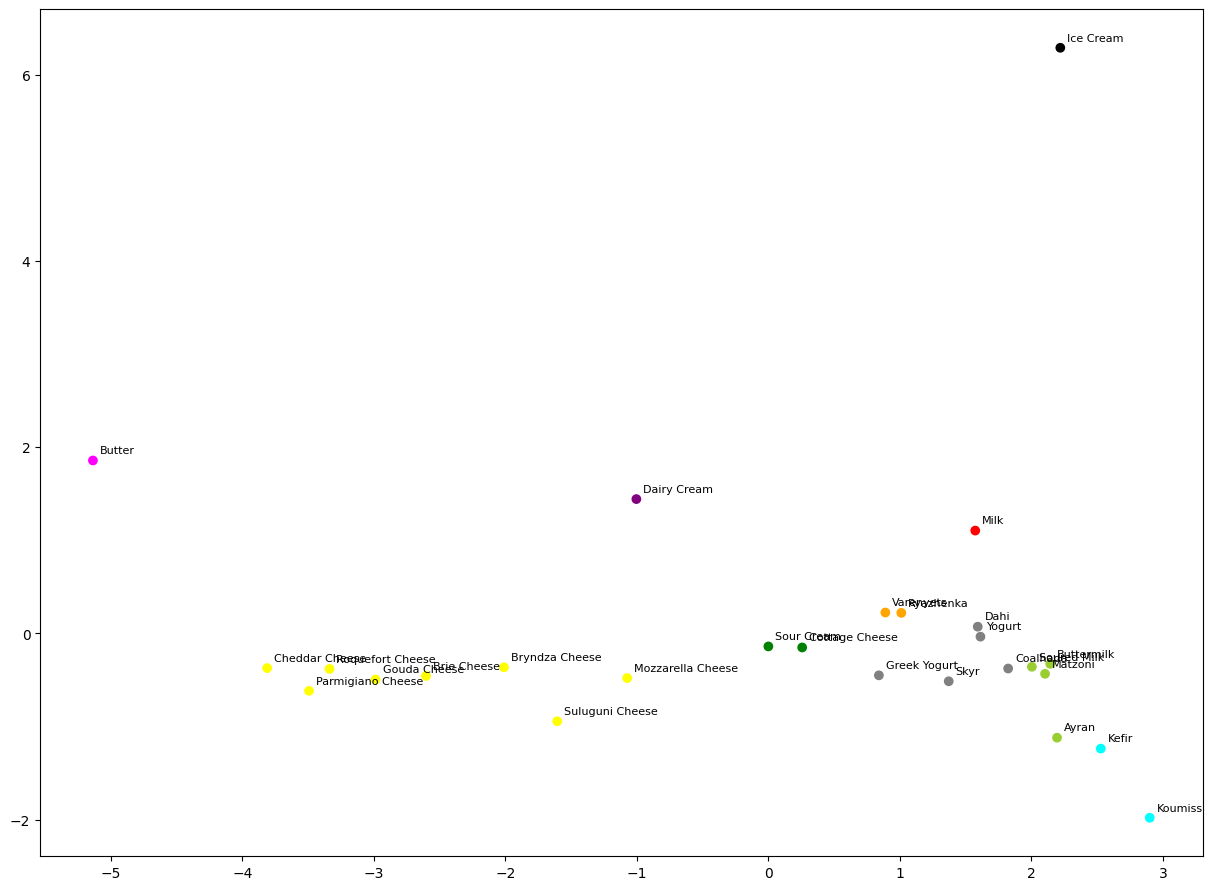

In [11]:
plt.figure(figsize=(15, 11))
plt.scatter(ordination_pca['x'], ordination_pca['y'], c=ordination_pca['color'])
for i, label in enumerate(ordination_pca['labels']):
    plt.annotate(ordination_pca['labels'][i], (ordination_pca['x'][i], ordination_pca['y'][i]), xytext=(5,5), textcoords='offset points', fontsize=8)
plt.show()

C:\Users\vladk\AppData\Local\Temp\ipykernel_5884\3172275960.py:2: UserWarning: The palette list has more values (12) than needed (10), which may not be intended.
  sns.scatterplot(data = ordination_pca, x='x', y ='y', hue='group', palette=palette)


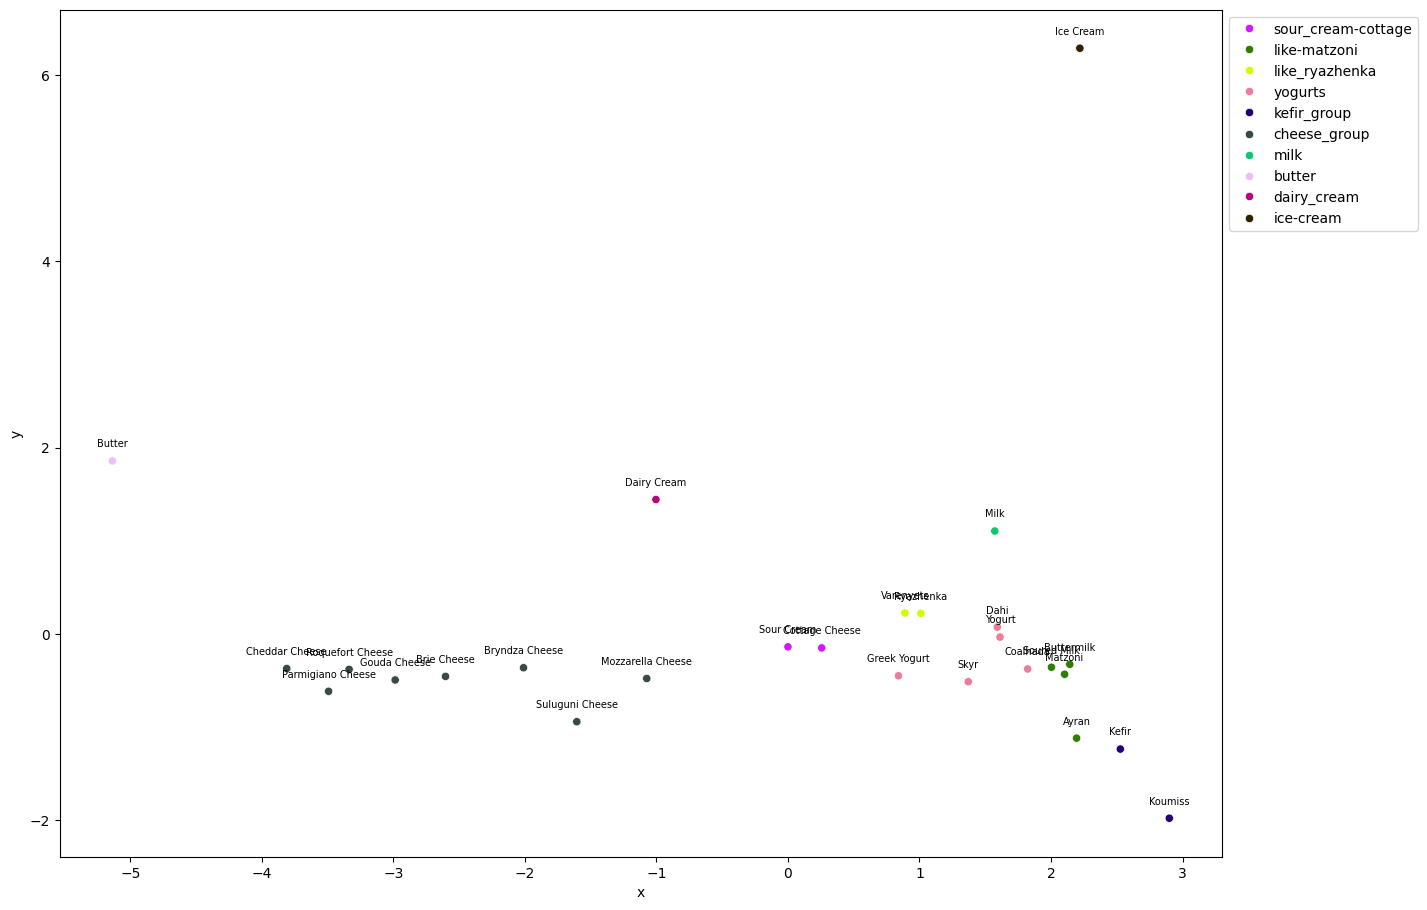

In [12]:
plt.figure(figsize=(15, 11))
sns.scatterplot(data = ordination_pca, x='x', y ='y', hue='group', palette=palette)
for i in range(len(ordination_pca)):
    plt.annotate(ordination_pca['labels'][i], (ordination_pca['x'][i], ordination_pca['y'][i]), textcoords='offset points', xytext=(0,10), ha='center',  fontsize=7)
plt.legend(bbox_to_anchor = (1,1), fontsize=10)
plt.show()

### Cluster tree

In [13]:
# calculate pairwise distances
pairwise_distances = squareform(pdist(transformed, metric='euclidean'))

# hierarchical Clustering
#clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward').fit(pairwise_distances)

C:\Users\vladk\AppData\Local\Temp\ipykernel_5884\1598529594.py:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendrogram = scipy.cluster.hierarchy.dendrogram(scipy.cluster.hierarchy.linkage(pairwise_distances, method='ward'), labels=transformed.index)


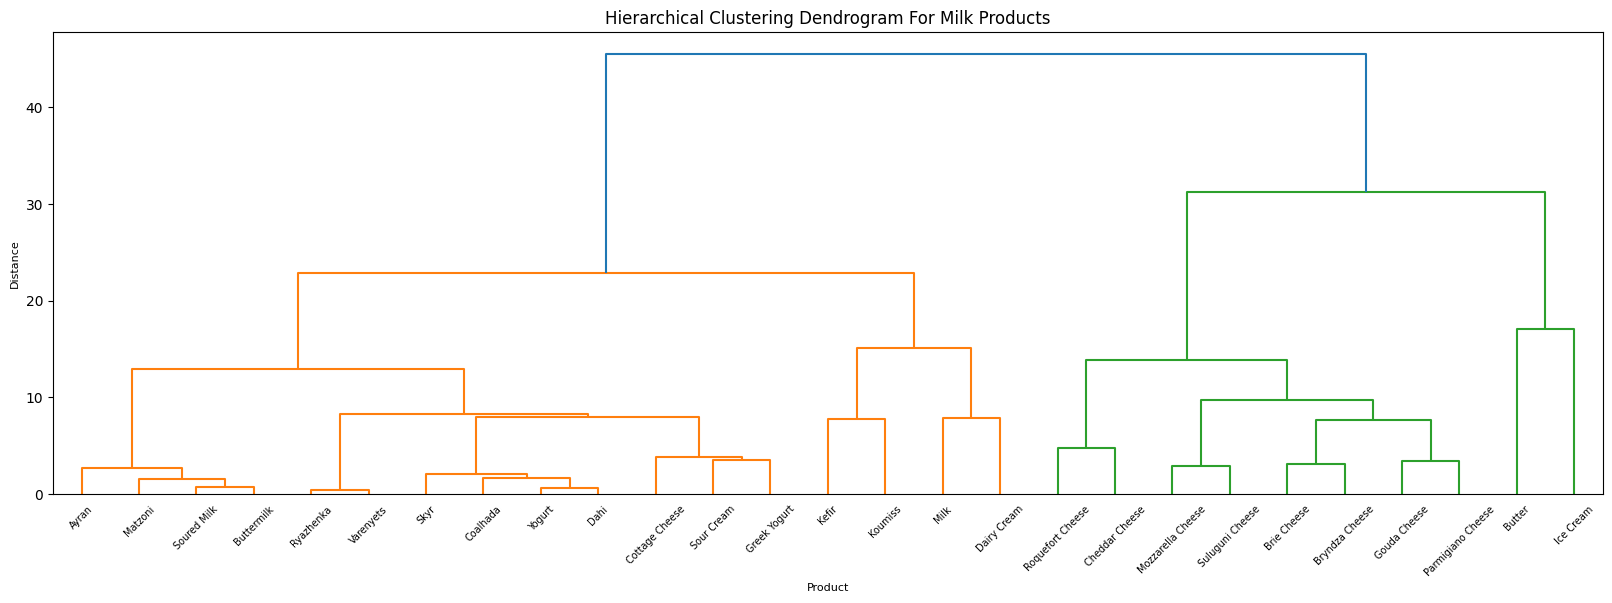

In [14]:
plt.figure(figsize=(20, 6))
dendrogram = scipy.cluster.hierarchy.dendrogram(scipy.cluster.hierarchy.linkage(pairwise_distances, method='ward'), labels=transformed.index)
plt.title('Hierarchical Clustering Dendrogram For Milk Products')
plt.xlabel('Product', fontsize=8)
plt.tick_params(axis='x', labelsize=7, rotation=45)
plt.ylabel('Distance', fontsize=8)
plt.savefig('03_cluster_milk.jpg', bbox_inches='tight')
plt.show()

### Clustermap

<Figure size 1200x2000 with 0 Axes>

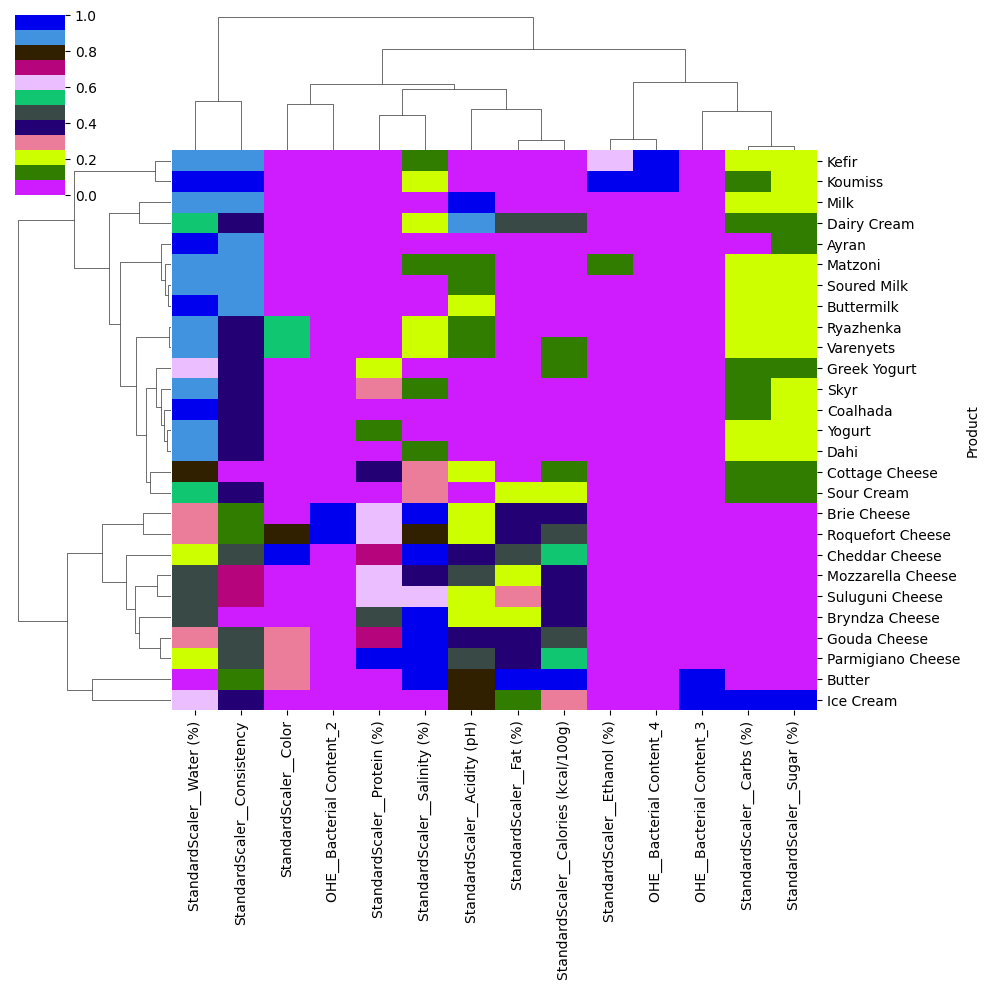

In [15]:
# here clustermap for reflect relathionships between features and products
plt.figure(figsize=(12, 20))
sns.clustermap(transformed, method="ward", 
               metric="euclidean", 
               standard_scale=1,
               cmap=palette)
plt.savefig('04_clustermap_milk.jpg', bbox_inches='tight')
plt.show()